In [1]:
from prophet import Prophet
import pandas as pd
from importlib import reload
import model_predict
reload(model_predict)
from matplotlib import pyplot as plt

In [2]:
series = model_predict.read_data_series()

In [3]:
series_train = series[:int(len(series)*0.8)]
series_test = series[int(len(series)*0.8):]

21:46:10 - cmdstanpy - INFO - Chain [1] start processing
21:46:10 - cmdstanpy - INFO - Chain [1] done processing


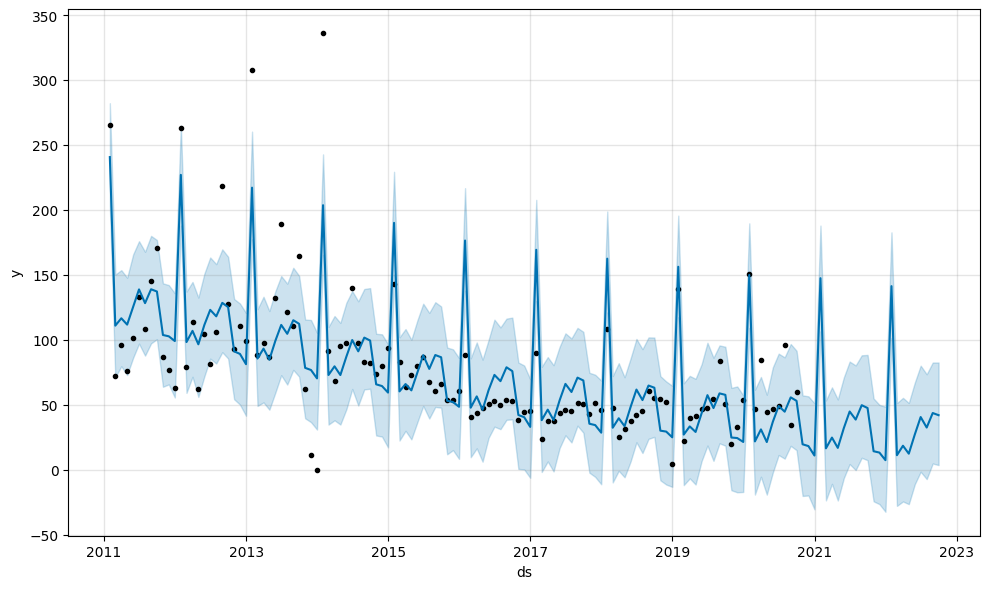

In [6]:
df = pd.DataFrame({'ds': series.index, 'y': series.values})
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)
model.plot(forecast)
plt.show()

MSE: 466.04
MAE: 16.50
R^2: 0.57
MAPE: 0.48


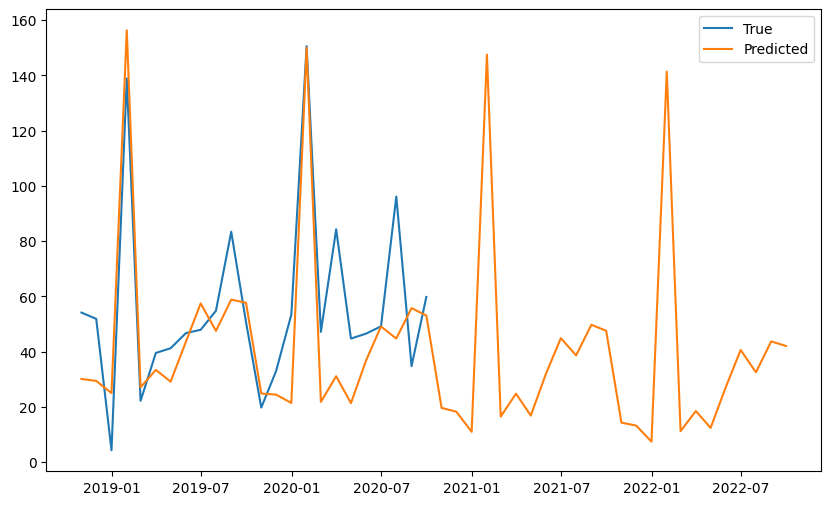

In [7]:
model_predict.evaluate_model_prophet(series_test, forecast)